# 淺度機器學習作品三 : 分類器的原理與評比實驗

### 學號 : 411072054 <br> 姓名 : 黃暐宸

### <font color=darkgoldenrod>作品目標</font>：<br> 


用三種分類器分別對資料進行分類學習與測試。其中分類器包括：
1. 多元羅吉斯回歸 (Multinomial Logistic Regression)
2. 支援向量機 (Support Vector Machine)
3. 神經網路 (Neural Network)

目標 :

1. 比較三種分類器在原始資料和主成分資料上的表現，找出在各種情況下表現最好的分類器和參數。

2. 機器學習最基本的概念是使機器能對多變量資料進行分類，在找表現最好的分類器和參數的過程中，初步了解機器學習到底在做甚麼事情。

3. 透過對不同大小的資料集進行分類學習與測試，了解資料量對機器學習造成的影響。

### 分類器介紹
1. 多元羅吉斯回歸 (Multinomial Logistic Regression)是一種用於處理多類別問題的監督學習算法。它使用羅吉斯函數來估計一個觀察值屬於某一類別的概率。最後，模型將觀察值分類到概率最高的類別。

2. 支援向量機 (Support Vector Machine):是一種二元分類器，其目標是找到一個超平面來最大化兩個類別之間的邊界。對於非線性問題，它可以使用核函數將資料映射到一個更高維度的空間，使得資料在這個空間中是線性可分的。

3. 神經網路 (Neural Network)是一種模仿人腦神經元工作方式的模型，由多個層次的節點（或稱為"神經元"）組成。每個節點將前一層的輸出進行加權總和，然後通過一個非線性函數（如ReLU或sigmoid）來產生自己的輸出。透過反向傳播和梯度下降等方法來學習權重。

## (一)準備資料 : AT&T 人臉資料。這組影像資料共有 40 人（類），每人 10 張影像，每張影像大小為64 × 64。

程式碼說明:
1. 訓練資料與測試資料必須分開標準化，而非標準化後再分成訓練與測試資料，將測試資料規劃為 25%。
2. 對訓練集和測試集進行標準化處理

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Read data
df = pd.read_csv("face_data.csv")
X = np.array(df.iloc[:, :-1]) # 排 除 最 後 一 欄 標 籤
y = np.array(df.iloc[:, -1]) # 標籤欄
# Split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
# Standardize data
scaler = StandardScaler()
X_train_ = scaler.fit_transform(X_train)
X_test_ = scaler.fit_transform(X_test)

In [5]:
num_samples = df.shape[0]
print(f"Number of samples: {num_samples}")

Number of samples: 400


## (二)用logistic regression分類

### (1)以標準化後之原始資料的訓練資料學習，並以測試資料測試準確率

程式碼說明:
1. opts = dict(tol = 1e-6, max_iter = int(1e6), verbose=1)創建了一個名為 opts 的字典，設定模型參數(tol: 容忍值, max_iter: 最大迭代次數, verbose: 是否顯示訓練過程)。
2. 分別設定不同的模型演算法(lbfgs、liblinear、newton-cg)。
3. 訓練模型，並使用訓練好的模型來預測測試數據。
4. 回報測試資料對於訓練完成的分類器的分類準確率，以兩種不同方式呈現，其中 accuracy_score 比對了測試資料的標籤（y_test）與分類預測值（y_pred），而 clf_original.score 直接給出準確率。兩者結果是一樣的。
5. 最後給出較完整的報告(classification_report)。

演算法(lbfgs)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

def train_LR(solver, X_train, y_train, X_test, y_test):
    opts = dict(tol = 1e-6, max_iter = int(1e6), verbose=1) 
    clf_LR = LogisticRegression(solver = solver, **opts) # 建立模型 
    clf_LR.fit(X_train, y_train) # 訓練模型
    y_pred = clf_LR.predict(X_test) # 預測測試資料
    # 測試資料之準確率回報
    print(f"{accuracy_score(y_test, y_pred):.2%}\n")
    print(f"{clf_LR.score(X_test, y_test):.2%}\n")
    print(classification_report(y_test, y_pred))


In [8]:
# 使用函數訓練模型
train_LR("lbfgs", X_train_, y_train, X_test_, y_test)

93.33%

93.33%

              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       1.00      1.00      1.00         6
           2       0.67      1.00      0.80         2
           3       1.00      0.67      0.80         3
           4       1.00      0.75      0.86         4
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         5
           7       1.00      0.50      0.67         2
           8       1.00      1.00      1.00         3
           9       1.00      0.67      0.80         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         4
          12       0.67      0.67      0.67         3
          13       1.00      1.00      1.00         3
          14       0.50      1.00      0.67         1
          15       1.00      1.00      1.00         4
          16       1.00      1.00      1.00         3
          1

### sklearn分類報告的項目說明:

1. Accuracy : 模型預測正確數量所佔整體的比例。
2. Precision : 精確率，被預測為 Positive 的資料中，有多少是真的 Positive。
3. Recall : 召回率，它是原本是 Positive 的資料，它能夠召回多少，也就是說在原本 Positive 的資料中被預測出多少。
4. F1-score : Precision 與 Recall 調和平均數，模型越接近1，模型越好。
5. support : 告訴測試資料集中有多少項目屬於每個類別。
6. macro avg : 對每個類別的precision、recall、f1-score加起來求平均。
7. weighted avg  : 按照support的權重，對每個類別的precision、recall、f1-score加起來求平均。

結果說明 :
1. 測試資料之準確率93.33%。
2. 在加權平均的評估指標中，模型的精確率、召回率和F1分數分別為0.96、0.93、0.94，這表示模型在每個類別的預測性能還不錯。

In [9]:
train_LR("liblinear", X_train_, y_train, X_test_, y_test)

[LibLinear]91.67%

91.67%

              precision    recall  f1-score   support

           0       1.00      0.40      0.57         5
           1       1.00      0.83      0.91         6
           2       1.00      1.00      1.00         2
           3       1.00      0.67      0.80         3
           4       1.00      0.75      0.86         4
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         5
           7       0.40      1.00      0.57         2
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         4
          12       1.00      0.67      0.80         3
          13       1.00      1.00      1.00         3
          14       0.50      1.00      0.67         1
          15       1.00      1.00      1.00         4
          16       0.75      1.00      0.86         3


結果說明 :
1. 測試資料之準確率91.67%。
2. 在加權平均的評估指標中，模型的精確率、召回率和F1分數分別為0.95、0.92、0.92，這表示模型在每個類別的預測性能還不錯。

In [10]:
train_LR("newton-cg", X_train_, y_train, X_test_, y_test)

93.33%

93.33%

              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       1.00      1.00      1.00         6
           2       0.67      1.00      0.80         2
           3       1.00      0.67      0.80         3
           4       1.00      0.75      0.86         4
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         5
           7       1.00      0.50      0.67         2
           8       1.00      1.00      1.00         3
           9       1.00      0.67      0.80         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         4
          12       0.67      0.67      0.67         3
          13       1.00      1.00      1.00         3
          14       0.50      1.00      0.67         1
          15       1.00      1.00      1.00         4
          16       1.00      1.00      1.00         3
          1

結果說明 :
1. 測試資料之準確率93.33%。
2. 在加權平均的評估指標中，模型的精確率、召回率和F1分數分別為0.96、0.93、0.94，這表示模型在每個類別的預測性能還不錯。

### 使用網格搜索（GridSearchCV）來尋找最佳的參數組合



程式碼說明:
1. 設定參數網格
2. 進行網格搜索(GridSearchCV)
3. 輸出最佳參數：網格搜索完成後，輸出找到的最佳參數組合
4. 預測並評估模型：使用訓練好的模型對測試數據進行預測，並輸出模型在測試數據上的準確度和分類報告


In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

param_grid = [
    {
        'solver': ['newton-cg', 'lbfgs', 'liblinear'],
        'tol': [1e-3, 1e-4, 1e-5, 1e-6],
        'max_iter': [int(1e3), int(1e4), int(1e5), int(1e6)]
    }
]

clf_LR = LogisticRegression()

clf_LR_gs = GridSearchCV(clf_LR, param_grid, verbose=1, cv=3, n_jobs=-1)

clf_LR_gs.fit(X_train_, y_train)

print("Best Parameters: ", clf_LR_gs.best_params_)

y_pred = clf_LR_gs.predict(X_test_)

print(f"{accuracy_score(y_test, y_pred):.2%}\n")
print(f"{clf_LR_gs.score(X_test_, y_test):.2%}\n")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best Parameters:  {'max_iter': 1000, 'solver': 'newton-cg', 'tol': 0.001}
97.00%

97.00%

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3
           2       0.75      1.00      0.86         3
           3       1.00      1.00      1.00         3
           4       1.00      0.80      0.89         5
           5       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         2
           9       1.00      0.67      0.80         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         4
          14       1.00      1.00    

結果說明 :

三種演算法表現最好的是newton-cg，參數設定是('max_iter': 1000, 'solver': 'newton-cg', 'tol': 0.001)，測試資料之準確率達到97%。

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io

D = scipy.io.loadmat("allFaces.mat")
X = D["faces"].T # 32256 x 2410, each column represents an image
y = np.ndarray.flatten(D["nfaces"])
m = D["m"].item() # 168
n = D["n"].item() # 192
n_persons = D["person"].item() # 38

# prepare y labels
y_labels = np.repeat(np.arange(len(y)), y)


### (2)以標準化後之原始資料的主成分之訓練資料學習，並以測試資料測試準確率

程式碼說明 :
1. 使用 PCA 對訓練數據 X_train_ 進行擬合，並將其降維到45個主成分。
2. 使用訓練好的 PCA 模型將訓練數據和測試數據轉換到新的低維空間，得到 Z_train 和 Z_test。
3. 設定並訓練羅吉斯迴歸模型。
4. 使用模型預測測試數據並計算準確率。
5. 輸出模型的分類報告。

演算法(lbfgs)

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 45).fit(X_train_)
Z_train = pca.transform(X_train_)
Z_test = pca.transform(X_test_)
opts = dict(tol = 1e-6, max_iter = int(1e6), verbose=1)
solver = "lbfgs" 
clf_PCA = LogisticRegression(solver = solver, **opts)
clf_PCA.fit(Z_train, y_train)
y_pred = clf_PCA.predict(Z_test)
print(f"{clf_PCA.score(Z_test, y_test):.2%}\n")
print(classification_report(y_test, y_pred))

93.33%

              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       1.00      1.00      1.00         6
           2       0.67      1.00      0.80         2
           3       1.00      0.67      0.80         3
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         5
           7       1.00      0.50      0.67         2
           8       1.00      1.00      1.00         3
           9       1.00      0.67      0.80         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         4
          12       0.50      0.67      0.57         3
          13       1.00      1.00      1.00         3
          14       0.50      1.00      0.67         1
          15       1.00      1.00      1.00         4
          16       1.00      1.00      1.00         3
          17       

結果說明 :
1. 測試資料之準確率93.33%。
2. 在加權平均的評估指標中，精確率、召回率和F1分數分別為0.96、0.93、0.93，這表示考慮到每個類別的樣本數量後，模型的整體性能仍然非常好。

演算法(liblinear)

In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 45).fit(X_train_)
Z_train = pca.transform(X_train_)
Z_test = pca.transform(X_test_)
opts = dict(tol = 1e-6, max_iter = int(1e6), verbose=1)
solver = "liblinear"
clf_PCA = LogisticRegression(solver = solver, **opts)
clf_PCA.fit(Z_train, y_train)
y_pred = clf_PCA.predict(Z_test)
print(f"{clf_PCA.score(Z_test, y_test):.2%}\n")
print(classification_report(y_test, y_pred))

[LibLinear]91.67%

              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       1.00      1.00      1.00         6
           2       0.67      1.00      0.80         2
           3       1.00      0.67      0.80         3
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         3
           6       1.00      0.80      0.89         5
           7       0.50      0.50      0.50         2
           8       1.00      1.00      1.00         3
           9       1.00      0.67      0.80         3
          10       1.00      1.00      1.00         3
          11       0.80      1.00      0.89         4
          12       0.67      0.67      0.67         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         4
          16       1.00      1.00      1.00         3
        

結果說明 :
1. 測試資料之準確率91.67%。
2. 在加權平均的評估指標中，精確率、召回率和F1分數分別為0.94、0.92、0.92，這表示考慮到每個類別的樣本數量後，模型的整體性能仍然非常好。

演算法(newton-cg)

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 45).fit(X_train_)
Z_train = pca.transform(X_train_)
Z_test = pca.transform(X_test_)
opts = dict(tol = 1e-6, max_iter = int(1e6), verbose=1)
solver = "newton-cg"
clf_PCA = LogisticRegression(solver = solver, **opts)
clf_PCA.fit(Z_train, y_train)
y_pred = clf_PCA.predict(Z_test)
print(f"{clf_PCA.score(Z_test, y_test):.2%}\n")
print(classification_report(y_test, y_pred))

94.17%

              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       1.00      1.00      1.00         6
           2       0.67      1.00      0.80         2
           3       1.00      0.67      0.80         3
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         5
           7       1.00      0.50      0.67         2
           8       1.00      1.00      1.00         3
           9       1.00      0.67      0.80         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         4
          12       0.50      0.67      0.57         3
          13       1.00      1.00      1.00         3
          14       0.50      1.00      0.67         1
          15       1.00      1.00      1.00         4
          16       1.00      1.00      1.00         3
          17       

結果說明 :
1. 測試資料之準確率94.17%。
2. 在加權平均的評估指標中，精確率、召回率和F1分數分別為0.96、0.94、0.94，這表示考慮到每個類別的樣本數量後，模型的整體性能仍然非常好。

### 使用網格搜索（GridSearchCV）來尋找最佳的參數組合


程式碼說明:
1. 設定參數網格
2. 進行網格搜索(GridSearchCV)
3. 輸出最佳參數：網格搜索完成後，輸出找到的最佳參數組合
4. 預測並評估模型：使用訓練好的模型對測試數據進行預測，並輸出模型在測試數據上的準確度和分類報告

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report

# 定義要搜索的參數
param_grid = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'tol': [1e-4, 1e-5, 1e-6],
    'max_iter': [ int(1e4), int(1e5), int(1e6)]
}

# 使用PCA降維
pca = PCA(n_components = 45).fit(X_train_)
Z_train = pca.transform(X_train_)
Z_test = pca.transform(X_test_)

# 建立模型
clf_PCA = LogisticRegression()

# 建立GridSearchCV
clf_PCA_gs = GridSearchCV(clf_PCA, param_grid, verbose=1, cv=3, n_jobs=-1)

# 訓練模型
clf_PCA_gs.fit(Z_train, y_train)

# 打印最佳參數
print("Best Parameters: ", clf_PCA_gs.best_params_)

# 預測測試資料
y_pred = clf_PCA_gs.predict(Z_test)

# 測試資料之準確率回報
print(f"{accuracy_score(y_test, y_pred):.2%}\n")
print(f"{clf_PCA_gs.score(Z_test, y_test):.2%}\n")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Parameters:  {'max_iter': 10000, 'solver': 'liblinear', 'tol': 0.0001}
95.00%

95.00%

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3
           2       0.75      1.00      0.86         3
           3       1.00      0.67      0.80         3
           4       1.00      0.80      0.89         5
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         2
           9       1.00      0.67      0.80         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         4
          14       0.67      1.00   

結果說明 :

三種演算法表現最好的是liblinear，參數設定是('max_iter': 10000, 'solver': 'liblinear', 'tol': 0.0001)，測試資料之準確率達到95%。

### 將主成分逐漸調高（直到 281），觀察準確率的變化，並畫一張折線圖來比較（與 scree plot 對比）。
選用lbfgs演算法

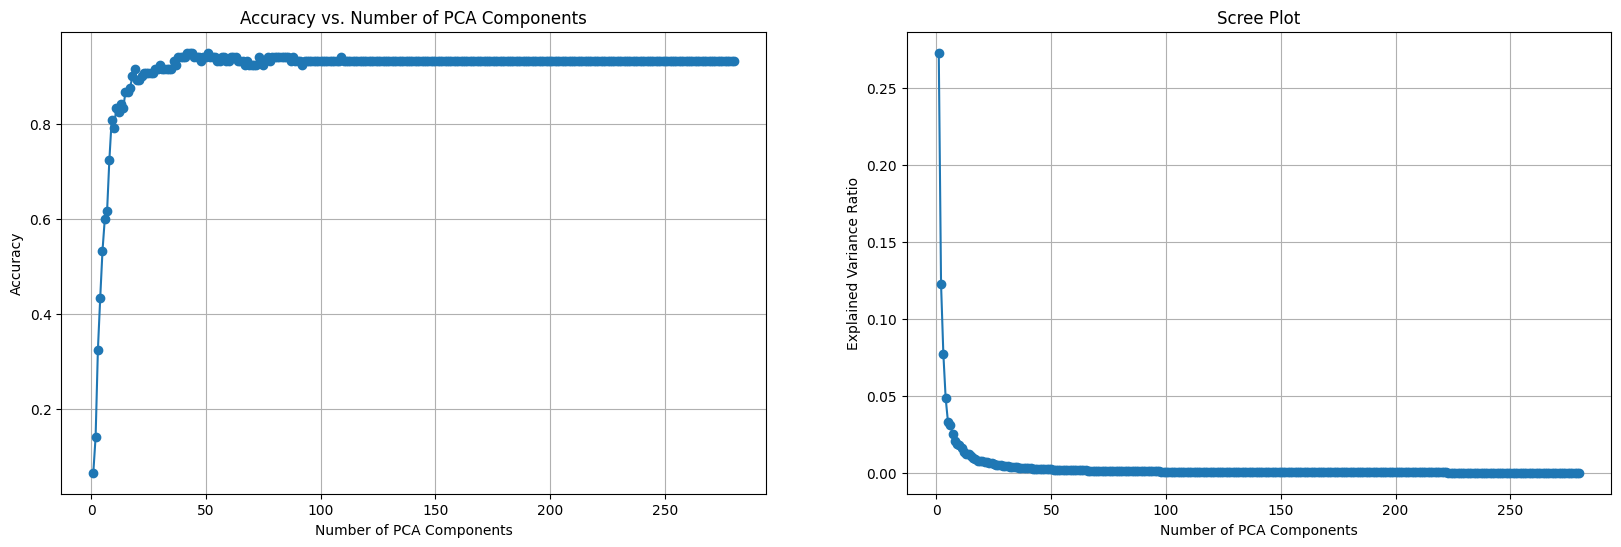

In [18]:
import matplotlib.pyplot as plt

# Initialize an empty list to store accuracy for each number of components
accuracy_scores = []
solver = "lbfgs"
# Loop over number of components from 1 to 13
for i in range(1, 281):
    pca = PCA(n_components=i).fit(X_train_)
    Z_train = pca.transform(X_train_)
    Z_test = pca.transform(X_test_)
    clf_PCA = LogisticRegression(solver=solver, **opts)
    clf_PCA.fit(Z_train, y_train)
    y_pred = clf_PCA.predict(Z_test)
    accuracy = clf_PCA.score(Z_test, y_test)
    accuracy_scores.append(accuracy)

# Create a figure and a grid of subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

# Plot the accuracy scores on the first subplot
ax1.plot(range(1, 281), accuracy_scores, marker='o', linestyle='-')
ax1.set_title('Accuracy vs. Number of PCA Components')
ax1.set_xlabel('Number of PCA Components')
ax1.set_ylabel('Accuracy')
ax1.grid(True)

# Fit PCA on the training data
pca = PCA().fit(X_train_)

# Calculate explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the explained variance ratio on the second subplot
ax2.plot(range(1, 281), explained_variance_ratio, marker='o', linestyle='-')
ax2.set_title('Scree Plot')
ax2.set_xlabel('Number of PCA Components')
ax2.set_ylabel('Explained Variance Ratio')
ax2.grid(True)

# Display the figure with the two subplots
plt.show()

結果說明 :
1. 從 Scree Plot 來看，將主成分逐漸調高，Explained Variance Ratio隨之降低。
2. 從左圖來看，只採用第一個主成分時，測試資料之準確率大約等於10%，隨著主成分逐漸調高，測試資料之準確率皆維持在大約等於90幾%。
3. 以上說明採用越多主成分，Explained Variance Ratio隨之降低，測試資料之準確率隨之提升。

## (三)SVM 分群

### (1)以標準化後之原始資料的訓練資料學習，並以測試資料測試準確率

kernel(linear)

In [51]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

def train_and_evaluate(clf, X_train, X_test, y_train, y_test):
    # Fit the classifier with the data
    clf.fit(X_train, y_train)

    # Predict the labels of the test data
    predictions = clf.predict(X_test)

    # Calculate and print the accuracy score
    acc_score = accuracy_score(y_test, predictions)
    print(f"Accuracy Score: {acc_score:.2%}")

    # Print the classification report
    print(classification_report(y_test, predictions, zero_division=0))
    
# Define the SVM classifier
C = 1 # SVM regularization parameter
opts = dict(C = C, tol = 1e-6, max_iter = int(1e6))

kernel(linear)

In [46]:
clf_svm = SVC(kernel="linear", **opts)
train_and_evaluate(clf_svm, X_train, X_test, y_train, y_test)

Accuracy Score: 94.17%
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         2
           3       1.00      0.67      0.80         3
           4       1.00      0.75      0.86         4
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         5
           7       1.00      0.50      0.67         2
           8       1.00      1.00      1.00         3
           9       1.00      0.67      0.80         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         4
          12       0.67      0.67      0.67         3
          13       1.00      1.00      1.00         3
          14       0.50      1.00      0.67         1
          15       1.00      1.00      1.00         4
          16       1.00      1.00      1.00         3
    

結果說明 :
1. 測試資料之準確率94.17%。
2. 在加權平均的評估指標中，精確率、召回率和F1分數分別為0.96、0.94、0.94，這表示考慮到每個類別的樣本數量後，模型的整體性能仍然非常好。

kernel(rbf)

In [47]:
clf_svm = SVC(kernel="rbf", gamma=0.2, **opts)
train_and_evaluate(clf_svm, X_train, X_test, y_train, y_test)

Accuracy Score: 2.50%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         3
           4       1.00      0.25      0.40         4
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         4
          12       0.00      0.00      0.00         3
          13       0.00      0.00      0.00         3
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         4
          16       0.00      0.00      0.00         3
     

結果說明 :
1. 測試資料之準確率2.5%。
2. 在加權平均的評估指標中，精確率、召回率和F1分數分別為0.04、0.03、0.02，這表示考慮到每個類別的樣本數量後，模型的整體性能。

kernel(poly)

In [48]:
clf_svm = SVC(kernel="poly", degree=3, gamma="auto", **opts)
train_and_evaluate(clf_svm, X_train, X_test, y_train, y_test)

Accuracy Score: 3.33%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         4
          12       0.00      0.00      0.00         3
          13       0.00      0.00      0.00         3
          14       0.02      1.00      0.05         1
          15       0.00      0.00      0.00         4
          16       0.00      0.00      0.00         3
     

結果說明 :
1. 測試資料之準確率3.33%。
2. 在加權平均的評估指標中，精確率、召回率和F1分數分別為0.00、0.03、0.0，這表示考慮到每個類別的樣本數量後，模型的整體性能。

kernel(LinearSVC : "one-vs-rest")

In [53]:
clf_svm = LinearSVC(dual=False, **opts) # one vs the rest
train_and_evaluate(clf_svm, X_train, X_test, y_train, y_test)

Accuracy Score: 92.50%
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       1.00      1.00      1.00         6
           2       0.67      1.00      0.80         2
           3       1.00      0.67      0.80         3
           4       1.00      0.75      0.86         4
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         5
           7       0.50      0.50      0.50         2
           8       1.00      1.00      1.00         3
           9       1.00      0.67      0.80         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         4
          12       1.00      0.67      0.80         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         4
          16       1.00      1.00      1.00         3
    

結果說明 :
1. 測試資料之準確率92.50%。
2. 在加權平均的評估指標中，精確率、召回率和F1分數分別為0.95、0.93、0.93，這表示考慮到每個類別的樣本數量後，模型的整體性能仍然非常好。

### 使用網格搜索（GridSearchCV）來尋找最佳的參數組合


程式碼說明:
1. 設定參數網格
2. 進行網格搜索(GridSearchCV)
3. 輸出最佳參數：網格搜索完成後，輸出找到的最佳參數組合
4. 預測並評估模型：使用訓練好的模型對測試數據進行預測，並輸出模型在測試數據上的準確度和分類報告

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, classification_report

# Define the parameter grid for GridSearchCV
param_grid = {
    'tol': [1e-4, 1e-5, 1e-6],
    'max_iter': [int(1e4), int(1e5), int(1e6)]
}

# Define the classifiers
classifiers = {
    'SVC_linear': SVC(kernel='linear', max_iter=int(1e6)),
    'SVC_rbf': SVC(kernel='rbf', max_iter=int(1e6)),
    'SVC_poly': SVC(kernel='poly', max_iter=int(1e6)),
    'LinearSVC': LinearSVC(max_iter=int(1e6), dual=False)
}

# Initialize the best accuracy and classifier
best_accuracy = 0
best_classifier = None
best_params = None
best_report = None

# For each classifier
for name, clf in classifiers.items():
    # Define the GridSearchCV
    clf_gs = GridSearchCV(clf, param_grid, verbose=1, cv=3, n_jobs=-1)

    # Train the model
    clf_gs.fit(X_train, y_train)

    # Predict the test data
    y_pred = clf_gs.predict(X_test)

    # Calculate the accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    # If the accuracy is better than the current best, update the best accuracy, classifier, parameters, and report
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_classifier = name
        best_params = clf_gs.best_params_
        best_report = classification_report(y_test, y_pred)

# Print the best results
print(f"Best Classifier: {best_classifier}")
print(f"Best Parameters: ", best_params)
print(f"Best Accuracy: {best_accuracy:.2%}\n")
print(f"Classification Report for {best_classifier}:\n", best_report)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best Classifier: SVC_linear
Best Parameters:  {'max_iter': 10000, 'tol': 0.0001}
Best Accuracy: 98.00%

Classification Report for SVC_linear:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       1.00      0.80      0.89         5
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         2
           9       1.00      0.67      0.80         3
          10       1.0


結果說明 :

三種kernel表現最好的是SVC_linear，參數設定是('max_iter': 10000, 'tol': 0.0001)，測試資料之準確率達到98%。

### (2)以標準化後之原始資料的主成分之訓練資料學習，並以測試資料測試準確率

程式碼說明 :
1. 使用 PCA 對訓練數據 X_train_ 進行擬合，並將其降維到兩個主成分。
2. 使用訓練好的 PCA 模型將訓練數據和測試數據轉換到新的低維空間，得到 Z_train 和 Z_test。
3. 定義SVM分類器。設置SVM的正則化參數C為1，並將其與其他參數一起存儲在opts中。
4. 使用PCA轉換後的訓練數據Z_train和對應的標籤y_train來訓練SVM分類器。
5. 輸出模型的分類報告。

In [58]:
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report

def train_and_evaluate(clf_svm, X_train_, X_test_, y_train, y_test):
    # Apply PCA to the training data and transform it
    pca = PCA(n_components = 45).fit(X_train_)
    Z_train = pca.transform(X_train_)
    Z_test = pca.transform(X_test_)

    # Fit the SVM classifier with the PCA transformed data
    clf_svm.fit(Z_train, y_train)

    # Predict the labels of the PCA transformed test data
    predictions = clf_svm.predict(Z_test)

    # Calculate and print the accuracy score
    acc_score = accuracy_score(y_test, predictions)
    print(f"Accuracy Score: {acc_score:.2%}")

    # Print the classification report
    print(classification_report(y_test, predictions, zero_division=0))

# Define the SVM classifier
C = 1 # SVM regularization parameter
opts = dict(C = C, tol = 1e-6, max_iter = int(1e6))


kernel(linear)

In [59]:
clf_svm = SVC(kernel="linear", **opts)
train_and_evaluate(clf_svm, X_train_, X_test_, y_train, y_test)

Accuracy Score: 92.50%
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         2
           3       1.00      0.67      0.80         3
           4       0.75      0.75      0.75         4
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         5
           7       1.00      0.50      0.67         2
           8       1.00      1.00      1.00         3
           9       1.00      0.67      0.80         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         4
          12       0.67      0.67      0.67         3
          13       1.00      1.00      1.00         3
          14       0.50      1.00      0.67         1
          15       1.00      1.00      1.00         4
          16       1.00      1.00      1.00         3
    

結果說明 :
1. 測試資料之準確率92.50%。
2. 在加權平均的評估指標中，精確率、召回率和F1分數分別為0.94、0.93、0.93，這表示考慮到每個類別的樣本數量後，模型的整體性能仍然非常好。

kernel(rbf)

In [60]:
clf_svm = SVC(kernel="rbf", gamma=0.2, **opts)
train_and_evaluate(clf_svm, X_train_, X_test_, y_train, y_test)

Accuracy Score: 0.83%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         4
          12       0.00      0.00      0.00         3
          13       0.00      0.00      0.00         3
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         4
          16       0.00      0.00      0.00         3
     

結果說明 :
1. 測試資料之準確率0.83%。
2. 在加權平均的評估指標中，精確率、召回率和F1分數分別為0.00、0.01、0.00，這表示考慮到每個類別的樣本數量後，模型的整體性非常糟糕。

kernel(poly)

In [61]:
clf_svm = SVC(kernel="poly", degree=3, gamma="auto", **opts)
train_and_evaluate(clf_svm, X_train_, X_test_, y_train, y_test)

Accuracy Score: 70.00%
              precision    recall  f1-score   support

           0       1.00      0.40      0.57         5
           1       1.00      0.50      0.67         6
           2       0.67      1.00      0.80         2
           3       0.00      0.00      0.00         3
           4       0.75      0.75      0.75         4
           5       1.00      1.00      1.00         3
           6       1.00      0.20      0.33         5
           7       1.00      0.50      0.67         2
           8       0.67      0.67      0.67         3
           9       1.00      0.67      0.80         3
          10       1.00      1.00      1.00         3
          11       1.00      0.50      0.67         4
          12       0.50      0.33      0.40         3
          13       1.00      0.67      0.80         3
          14       0.04      1.00      0.08         1
          15       0.75      0.75      0.75         4
          16       1.00      1.00      1.00         3
    

結果說明 :
1. 測試資料之準確率70%。
2. 在加權平均的評估指標中，精確率、召回率和F1分數分別為0.86、0.70、0.73，這表示考慮到每個類別的樣本數量後，模型的整體性能。

kernel(LinearSVC : "one-vs-rest")

In [63]:
clf_svm = LinearSVC(dual=False, **opts) # one vs the rest
train_and_evaluate(clf_svm, X_train_, X_test_, y_train, y_test)

Accuracy Score: 90.83%
              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       1.00      1.00      1.00         6
           2       0.67      1.00      0.80         2
           3       1.00      0.67      0.80         3
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         3
           6       1.00      0.80      0.89         5
           7       0.50      0.50      0.50         2
           8       1.00      1.00      1.00         3
           9       1.00      0.67      0.80         3
          10       1.00      1.00      1.00         3
          11       0.80      1.00      0.89         4
          12       0.67      0.67      0.67         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         1
          15       1.00      0.75      0.86         4
          16       1.00      1.00      1.00         3
    

結果說明 :
1. 測試資料之準確率90.83%。
2. 在加權平均的評估指標中，精確率、召回率和F1分數分別為0.93、0.91、0.91，這表示考慮到每個類別的樣本數量後，模型的整體性能很好。

### 使用網格搜索（GridSearchCV）來尋找最佳的參數組合

程式碼說明:
1. 設定參數網格
2. 進行網格搜索(GridSearchCV)
3. 輸出最佳參數：網格搜索完成後，輸出找到的最佳參數組合
4. 預測並評估模型：使用訓練好的模型對測試數據進行預測，並輸出模型在測試數據上的準確度和分類報告

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC, LinearSVC

def train_and_evaluate(X_train_, X_test_, y_train, y_test):
    # Apply PCA to the training data and transform it
    pca = PCA(n_components = 45).fit(X_train_)
    Z_train = pca.transform(X_train_)
    Z_test = pca.transform(X_test_)

    # Define the parameter grid for GridSearchCV
    param_grid = {
        'tol': [1e-4, 1e-5, 1e-6],
        'max_iter': [int(1e4), int(1e5), int(1e6)]
    }

    # Define the classifiers
    classifiers = {
        'SVC_linear': SVC(kernel='linear', max_iter=int(1e6)),
        'SVC_rbf': SVC(kernel='rbf', max_iter=int(1e6)),
        'SVC_poly': SVC(kernel='poly', max_iter=int(1e6)),
        'LinearSVC': LinearSVC(max_iter=int(1e6), dual=False)
    }

    # Initialize the best accuracy and classifier
    best_accuracy = 0
    best_classifier = None
    best_params = None
    best_report = None

    # For each classifier
    for name, clf in classifiers.items():
        # Define the GridSearchCV
        clf_gs = GridSearchCV(clf, param_grid, verbose=1, cv=3, n_jobs=-1)

        # Fit the classifier with the PCA transformed data
        clf_gs.fit(Z_train, y_train)

        # Predict the labels of the PCA transformed test data
        predictions = clf_gs.predict(Z_test)

        # Calculate the accuracy score
        acc_score = accuracy_score(y_test, predictions)

        # If the accuracy is better than the current best, update the best accuracy, classifier, parameters, and report
        if acc_score > best_accuracy:
            best_accuracy = acc_score
            best_classifier = name
            best_params = clf_gs.best_params_
            best_report = classification_report(y_test, predictions)

    # Print the best classifier, parameters and accuracy
    print(f"Best Classifier: {best_classifier}")
    print(f"Best Parameters: ", best_params)
    print(f"Best Accuracy: {best_accuracy:.2%}\n")
    print(f"Classification Report for {best_classifier}:\n", best_report)
train_and_evaluate(X_train_, X_test_, y_train, y_test)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best Classifier: SVC_linear
Best Parameters:  {'max_iter': 10000, 'tol': 0.0001}
Best Accuracy: 98.00%

Classification Report for SVC_linear:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3
           2       0.75      1.00      0.86         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         2
           9       1.00      0.67      0.80         3
          10       1.0


結果說明 :

三種kernel表現最好的是SVC_linear，參數設定是('max_iter': 10000, 'tol': 0.0001)，測試資料之準確率達到98%。

### 將主成分逐漸調高（直到 281），觀察準確率的變化，並畫一張折線圖來比較（與 scree plot 對比）。
(選用linear kernel)

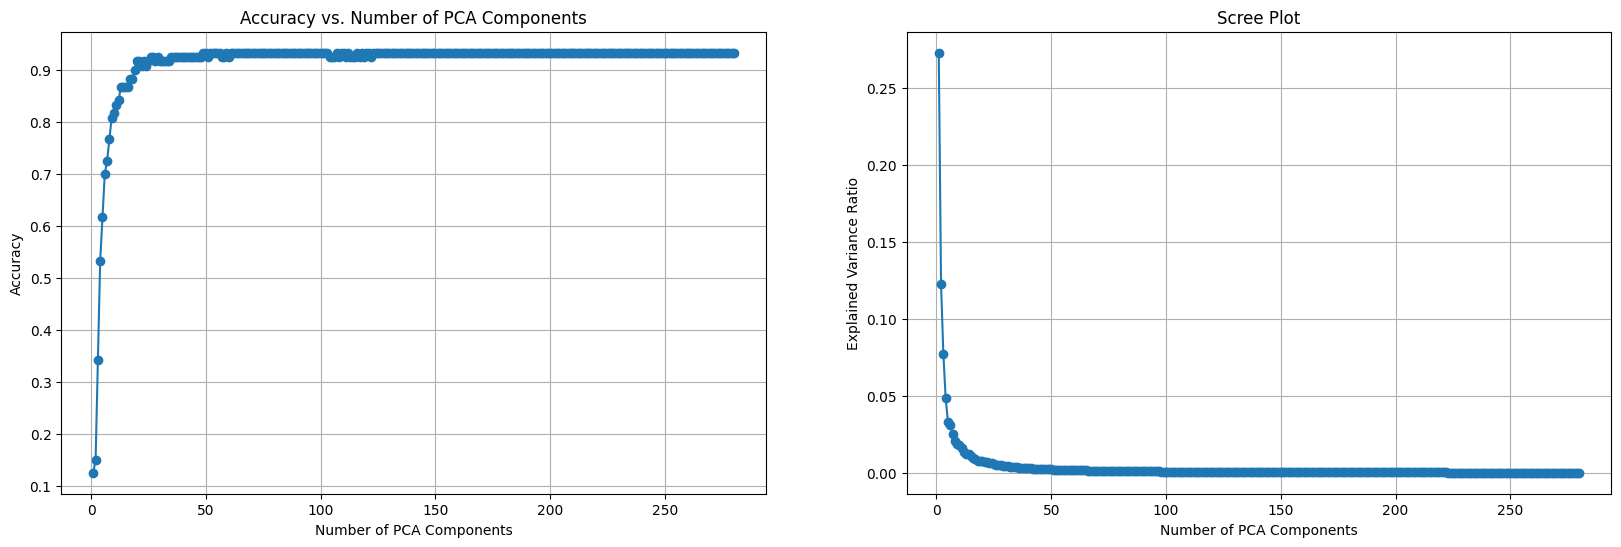

In [66]:
from sklearn.svm import SVC
import warnings
from sklearn.exceptions import ConvergenceWarning

# Ignore ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
# Initialize an empty list to store accuracy for each number of components
accuracy_scores = []
C = 1 # SVM regularization parameter
opts = dict(C = C, tol = 1e-6, max_iter = int(1e6))

# Loop over number of components from 1 to 13
for i in range(1, 281):
    pca = PCA(n_components=i).fit(X_train_)
    Z_train = pca.transform(X_train_)
    Z_test = pca.transform(X_test_)
    clf_PCA = SVC(kernel="linear", **opts)
    clf_PCA.fit(Z_train, y_train)
    y_pred = clf_PCA.predict(Z_test)
    accuracy = clf_PCA.score(Z_test, y_test)
    accuracy_scores.append(accuracy)

# Create a figure and a grid of subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

# Plot the accuracy scores on the first subplot
ax1.plot(range(1, 281), accuracy_scores, marker='o', linestyle='-')
ax1.set_title('Accuracy vs. Number of PCA Components')
ax1.set_xlabel('Number of PCA Components')
ax1.set_ylabel('Accuracy')
ax1.grid(True)

# Fit PCA on the training data
pca = PCA().fit(X_train_)

# Calculate explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the explained variance ratio on the second subplot
ax2.plot(range(1, 281), explained_variance_ratio, marker='o', linestyle='-')
ax2.set_title('Scree Plot')
ax2.set_xlabel('Number of PCA Components')
ax2.set_ylabel('Explained Variance Ratio')
ax2.grid(True)

# Display the figure with the two subplots
plt.show()

結果說明 :
1. 從 Scree Plot 來看，將主成分逐漸調高，Explained Variance Ratio隨之降低。
2. 從左圖來看，只採用第一個主成分時，測試資料之準確率大約等於10%，隨著主成分逐漸調高，測試資料之準確率皆維持在大約等於90幾%。
3. 以上說明採用越多主成分，Explained Variance Ratio隨之降低，測試資料之準確率隨之提升。

## (四)神經網路（Neural Network）

### (1)以標準化後之原始資料的訓練資料學習，並以測試資料測試準確率

程式碼說明:
1. 定義並訓練 MLP 分類器
2. 進行預測，將預測結果存儲在 predictions 變量中
3. 評估模型，使用 classification_report 函數來生成一個分類報告
4. 設定使用不同演算法

In [73]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

def train_MLP(solver, X_train, y_train, X_test, y_test):
    hidden_layers = (30,)
    activation = "logistic"
    opts = dict(hidden_layer_sizes = hidden_layers , verbose = False, \
    activation = activation, tol = 1e-6, max_iter = int(1e6))

    clf_MLP = MLPClassifier(solver = solver, **opts)
    clf_MLP.fit(X_train, y_train)
    predictions = clf_MLP.predict(X_test)
    print(classification_report(y_test, predictions, zero_division=0))

演算法(adam)

In [74]:
# 使用函數訓練模型
train_MLP("adam", X_train, y_train, X_test, y_test)

              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         2
           3       1.00      0.67      0.80         3
           4       1.00      0.75      0.86         4
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         5
           7       1.00      0.50      0.67         2
           8       1.00      1.00      1.00         3
           9       1.00      0.67      0.80         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         4
          12       0.60      1.00      0.75         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         4
          16       1.00      1.00      1.00         3
          17       0.50    

結果說明 :
1. 測試資料之準確率95%。
2. 在加權平均的評估指標中，模型的精確率、召回率和F1分數分別為0.97、0.95、0.95，這表示模型在每個類別的預測性能很好。

演算法(sgd)

In [75]:
train_MLP("sgd", X_train, y_train, X_test, y_test)

              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       1.00      1.00      1.00         6
           2       0.67      1.00      0.80         2
           3       1.00      0.67      0.80         3
           4       1.00      0.75      0.86         4
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         5
           7       0.50      0.50      0.50         2
           8       1.00      1.00      1.00         3
           9       1.00      0.67      0.80         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         4
          12       1.00      0.67      0.80         3
          13       1.00      1.00      1.00         3
          14       0.50      1.00      0.67         1
          15       1.00      1.00      1.00         4
          16       1.00      1.00      1.00         3
          17       0.50    

結果說明 :
1. 測試資料之準確率93%。
2. 在加權平均的評估指標中，模型的精確率、召回率和F1分數分別為0.95、0.93、0.93，這表示模型在每個類別的預測性能很好。

演算法(lbfgs)

In [76]:
train_MLP("lbfgs", X_train, y_train, X_test, y_test)

              precision    recall  f1-score   support

           0       1.00      0.40      0.57         5
           1       1.00      0.83      0.91         6
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         3
           4       0.60      0.75      0.67         4
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         5
           7       1.00      0.50      0.67         2
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         4
          12       0.67      0.67      0.67         3
          13       0.75      1.00      0.86         3
          14       1.00      1.00      1.00         1
          15       0.75      0.75      0.75         4
          16       1.00      1.00      1.00         3
          17       1.00    

結果說明 :
1. 測試資料之準確率92%。
2. 在加權平均的評估指標中，模型的精確率、召回率和F1分數分別為0.93、0.92、0.91，這表示模型在每個類別的預測性能很好。

三種演算法表現最好的是adamc，測試資料之準確率95%。

### (2)以標準化後之原始資料的主成分之訓練資料學習，並以測試資料測試準確率

程式碼說明:
1. 定義並訓練 MLP 分類器
2. 進行預測，將預測結果存儲在 predictions 變量中
3. 設定保留前兩個主成分
4. 評估模型，使用 classification_report 函數來生成一個分類報告
5. 設定使用不同演算法

In [77]:
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

def train_MLP_with_PCA(solver, X_train, y_train, X_test, y_test):
    # Define the PCA transformer
    pca = PCA(n_components=45)

    # Apply PCA to the training data and transform it
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    hidden_layers = (30,)
    activation = "logistic"
    opts = dict(hidden_layer_sizes = hidden_layers , verbose = False, \
    activation = activation, tol = 1e-6, max_iter = int(1e6))

    clf_MLP = MLPClassifier(solver = solver, **opts)
    clf_MLP.fit(X_train_pca, y_train)
    predictions = clf_MLP.predict(X_test_pca)
    print(classification_report(y_test, predictions))



演算法(adam)

In [78]:
# 使用函數訓練模型
train_MLP_with_PCA("adam", X_train, y_train, X_test, y_test)

              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       1.00      0.83      0.91         6
           2       0.67      1.00      0.80         2
           3       0.50      0.67      0.57         3
           4       1.00      0.75      0.86         4
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         5
           7       1.00      0.50      0.67         2
           8       1.00      1.00      1.00         3
           9       1.00      0.67      0.80         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         4
          12       0.67      0.67      0.67         3
          13       1.00      1.00      1.00         3
          14       0.50      1.00      0.67         1
          15       1.00      1.00      1.00         4
          16       1.00      1.00      1.00         3
          17       1.00    

結果說明 :
1. 測試資料之準確率93%。
2. 在加權平均的評估指標中，模型的精確率、召回率和F1分數分別為0.95、0.93、0.93，這表示模型在每個類別的預測性能。

演算法(sgd)

In [79]:
# 使用函數訓練模型
train_MLP_with_PCA("sgd", X_train, y_train, X_test, y_test)

              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         2
           3       0.67      0.67      0.67         3
           4       1.00      0.75      0.86         4
           5       0.75      1.00      0.86         3
           6       1.00      1.00      1.00         5
           7       1.00      0.50      0.67         2
           8       1.00      1.00      1.00         3
           9       1.00      0.67      0.80         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         4
          12       0.67      0.67      0.67         3
          13       0.75      1.00      0.86         3
          14       0.50      1.00      0.67         1
          15       0.80      1.00      0.89         4
          16       1.00      1.00      1.00         3
          17       1.00    

結果說明 :
1. 測試資料之準確率92%。
2. 在加權平均的評估指標中，模型的精確率、召回率和F1分數分別為0.94、0.92、0.92，這表示模型在每個類別的預測性能很好。

演算法(lbfgs)

In [80]:
# 使用函數訓練模型
train_MLP_with_PCA("lbfgs", X_train, y_train, X_test, y_test)

              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       1.00      1.00      1.00         6
           2       0.67      1.00      0.80         2
           3       0.67      0.67      0.67         3
           4       1.00      0.75      0.86         4
           5       0.75      1.00      0.86         3
           6       1.00      1.00      1.00         5
           7       1.00      0.50      0.67         2
           8       1.00      1.00      1.00         3
           9       0.67      0.67      0.67         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         4
          12       1.00      0.67      0.80         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         1
          15       0.80      1.00      0.89         4
          16       0.75      1.00      0.86         3
          17       0.50    

結果說明 :
1. 測試資料之準確率93%。
2. 在加權平均的評估指標中，模型的精確率、召回率和F1分數分別為0.94、0.93、0.92，這表示模型在每個類別的預測性能很好。

三種演算法表現最好的是adamc和lbfgs，測試資料之準確率93%。

### <font color=blue>對兩種資料型態與三個分類器的表現做比較</font>

多元羅吉斯回歸 (Multinomial Logistic Regression)

1. 原始資料 : accuracy大約97%
2. 主成分資料(取前2個) : accuracy大約95%

支援向量機 (Support Vector Machine)

1. 原始資料 : accuracy大約98%
2. 主成分資料(取前2個) : accuracy大約98%

神經網路 (Neural Network)

1. 原始資料 : accuracy大約95%
2. 主成分資料(取前2個) : accuracy大約93%

結果: 
1. 在原始資料下，支援向量機的測試資料之準確率最高，達97%；再來是多元羅吉斯回歸，測試資料之準確率達97%；最後是神經網路，測試資料之準確率達95%。
2. 主成分資料(取前45個)下，支援向量機的測試資料最高，達98%；多元羅吉斯回歸的測試資料之準確率95%；最後是神經網路，測試資料之準確率達93%。

<font color=darkgoldenrod>個人見解</font> :

1. 支援向量機在所有情況下都有最高的準確率。
2. 神經網路在降維後的資料上表現較差，可能因為資訊損失或模型複雜度過高。
3. 對於這組較小的資料，較簡單的模型（多元羅吉斯回歸和支援向量機）表現較好，可能因為神經網路無法充分學習。